In [1]:
# Import data and perform processing 
import os as os 

In [2]:
# import the relevent package
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

# setting the working directory

In [3]:
os.chdir('C:\\Users\\MyPC\\Desktop\\practice datasets')

In [4]:
os.getcwd()

'C:\\Users\\MyPC\\Desktop\\practice datasets'

In [5]:
os.listdir()

['.RData',
 '.Rhistory',
 'country_vaccinations.csv',
 'Fish.csv',
 'gender_submission.csv',
 'Real estate.csv',
 'test.csv',
 'train.csv']

In [6]:
# read the dataset
train = pd.read_csv('train.csv')

test = pd.read_csv('test.csv')

submission = pd.read_csv('gender_submission.csv')

In [7]:
# check the dimension of the datset
print("Dimension of the training data",train.shape)
print("Dimension of the testing data",test.shape)
print("Dimension of the submission data",submission.shape)

Dimension of the training data (891, 12)
Dimension of the testing data (418, 11)
Dimension of the submission data (418, 2)


In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
train = train.drop(['Name','PassengerId'], axis=1) # we are dropping these columns because we dont need.

In [12]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


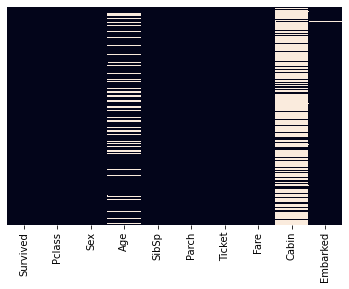

In [13]:
# using heatmap to figure out missing data if any
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [14]:
train.isnull().sum()/len(train)

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

In [15]:
train = train.drop(['Cabin'], axis=1)

In [16]:
train.isnull().sum()/len(train)

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Embarked    0.002245
dtype: float64

In [17]:
train['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [18]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
# Imputation of categorical variables for training data
train['Embarked'].fillna('S',inplace=True)

In [20]:
# compute the median value for Age 
np.nanmedian(train['Age'])

28.0

In [21]:
# Imputation for Age

train['Age'].fillna(28.0,inplace=True)

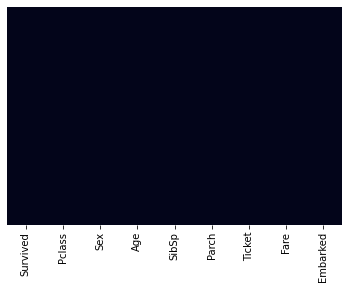

In [22]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [23]:
# creating the dummy variable
train_dummy_cod = pd.get_dummies(train.drop(['Ticket'],axis=1),drop_first=True)

 # we are dropping ticket columns because while we are creating dummy variables it will creating large no. of variable so we 
 # going to delete it.

In [24]:
train_dummy_cod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


In [25]:
train_dummy_cod.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


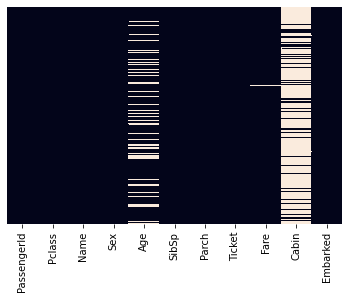

In [26]:
# using heatmap to figure out missing data if any
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

In [27]:
test.isnull().sum()/len(test)

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

In [28]:
test = test.drop(['Cabin'], axis=1)

In [29]:
test.isnull().sum()/len(test)

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Embarked       0.000000
dtype: float64

In [30]:
test['Age'].value_counts()

24.0    17
21.0    17
22.0    16
30.0    15
18.0    13
        ..
7.0      1
60.5     1
26.5     1
76.0     1
34.5     1
Name: Age, Length: 79, dtype: int64

In [31]:
test['Fare'].value_counts()

7.7500     21
26.0000    19
8.0500     17
13.0000    17
7.8958     11
           ..
9.3250      1
14.4583     1
15.0333     1
25.4667     1
21.0750     1
Name: Fare, Length: 169, dtype: int64

In [32]:
# compute the median value for Age 
np.nanmedian(test['Age'])

27.0

In [33]:
# compute the median value for Fare 
np.nanmedian(test['Fare'])

14.4542

In [34]:
# Imputation for Age and Fare

test['Age'].fillna(27.0,inplace=True)

test['Fare'].fillna(14.4542,inplace=True)

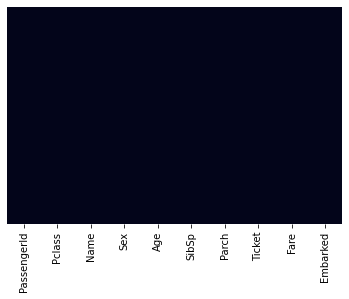

In [35]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=False)

In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [37]:
test = test.drop(['Name','PassengerId'], axis=1)

In [38]:
test_dummy_cod = pd.get_dummies(test.drop(['Ticket'],axis=1),drop_first=True)

In [39]:
test_dummy_cod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Age         418 non-null    float64
 2   SibSp       418 non-null    int64  
 3   Parch       418 non-null    int64  
 4   Fare        418 non-null    float64
 5   Sex_male    418 non-null    uint8  
 6   Embarked_Q  418 non-null    uint8  
 7   Embarked_S  418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 17.7 KB


In [40]:
test_dummy_cod.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [41]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [42]:
# Descriptive Statistics
x = train['Age']

y = train['Fare']

Text(0, 0.5, 'Fare')

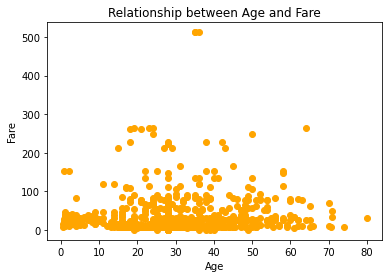

In [43]:
# check the relationship between the Age and Fare using a scatter plot
plt.scatter(x,y,color="orange")

plt.title("Relationship between Age and Fare")

plt.xlabel("Age")

plt.ylabel("Fare")

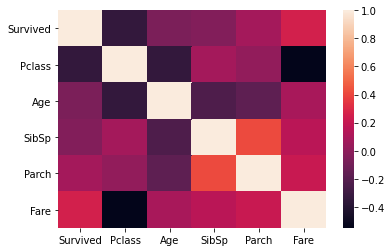

In [44]:
# checking correlation between diff variables
sns.heatmap(train.corr())

In [45]:
# checking correlation between diff variables
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


In [46]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


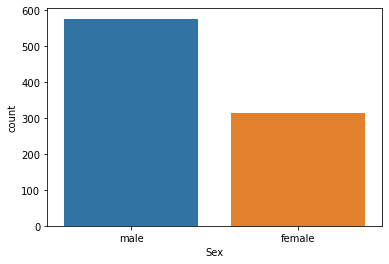

In [47]:
# do a count check for the categorical variable
sns.countplot(x="Sex",data=train)
plt.show()

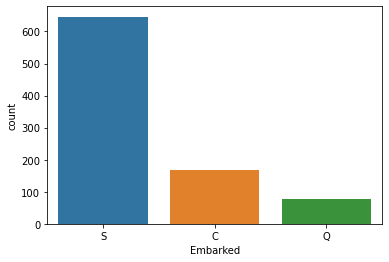

In [48]:
# do a count check for the categorical variable(Embarked)
sns.countplot(x="Embarked",data=train)
plt.show()

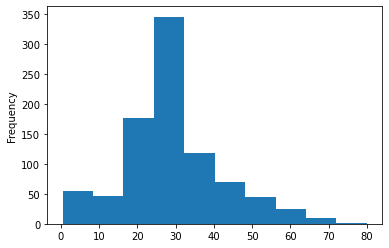

In [49]:
# histogram of the Age in the training dataset
train['Age'].plot.hist()

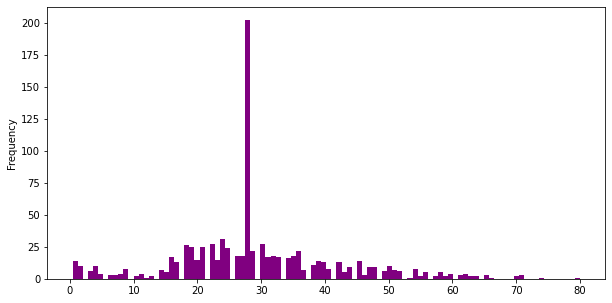

In [50]:
# effect of increasing the bin size
# skeweness evident
train['Age'].plot.hist(bins=100,figsize=(10,5),color="purple")

In [51]:
# Crosstabulating the Sex and the Age
pd.crosstab(train['Sex'],train['Age'])

Age,0.42,0.67,0.75,0.83,0.92,1.00,2.00,3.00,4.00,5.00,...,62.00,63.00,64.00,65.00,66.00,70.00,70.50,71.00,74.00,80.00
Sex,,,,,,,,,,,,,,,,,,,,,
female,0,0,2,0,0,2,6,2,5,4,...,1,2,0,0,0,0,0,0,0,0
male,1,1,0,2,1,5,4,4,5,0,...,3,0,2,3,1,2,1,2,1,1


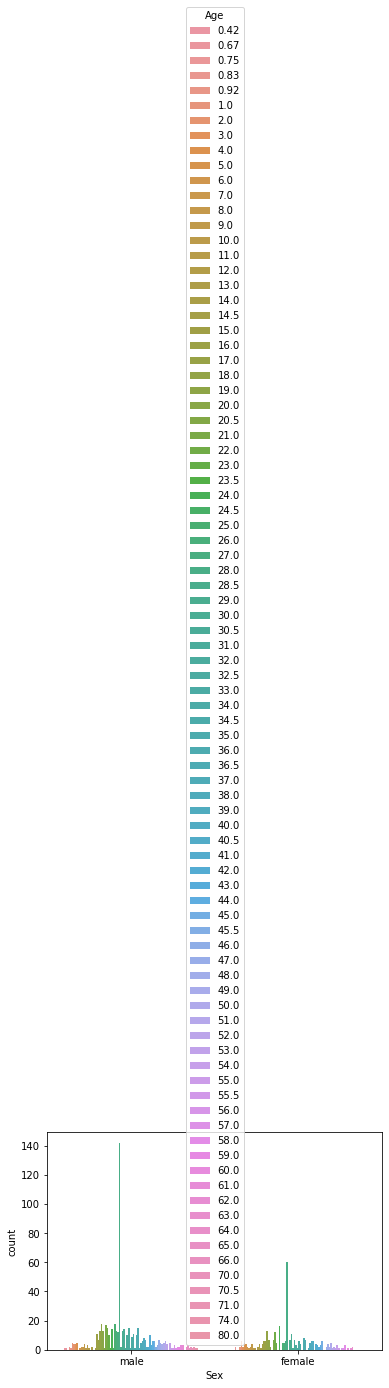

In [52]:
# Sex vs Age
sns.countplot(x="Sex",hue="Age",data=train)

In [53]:
# Crosstabulating the Sex and Embarked
pd.crosstab(train['Sex'],train['Embarked'])

Embarked,C,Q,S
Sex,,,
female,73,36,205
male,95,41,441


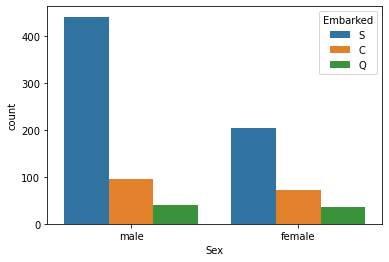

In [54]:
# Sex vs Embarked
sns.countplot(x="Sex",hue="Embarked",data=train)

In [55]:
# Crosstabulating Survived and Age
pd.crosstab(train['Survived'],train['Age'])

Age,0.42,0.67,0.75,0.83,0.92,1.00,2.00,3.00,4.00,5.00,...,62.00,63.00,64.00,65.00,66.00,70.00,70.50,71.00,74.00,80.00
Survived,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,2,7,1,3,0,...,2,0,2,3,1,2,1,2,1,0
1,1,1,2,2,1,5,3,5,7,4,...,2,2,0,0,0,0,0,0,0,1


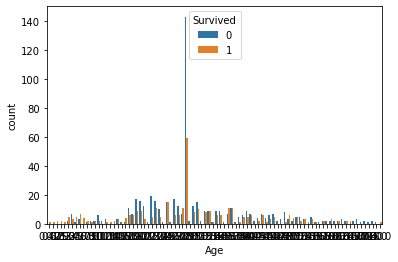

In [56]:
# Survived vs Age
sns.countplot(x="Age",hue="Survived",data=train)

In [57]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [66]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [68]:
# Segregating the input and the output varaible 
train_inp= train_dummy_cod.drop(['Survived'],axis=1)

train_out= train_dummy_cod['Survived']

In [69]:
from sklearn.linear_model import LogisticRegression
log_reg= LogisticRegression()
log_reg.fit(train_inp,train_out)

C:\Users\MyPC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
train_dummy_cod.shape

(891, 9)

In [71]:
train_dummy_cod.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [72]:
test_dummy_cod.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [73]:
prediction_test= log_reg.predict(test_dummy_cod)
prediction_test

# wherever it is 1 it means survived  or 0 means not survived.

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [76]:
# Model Evaluation using performance measures
from sklearn.metrics import classification_report

In [77]:
# performance measures/ratios
classification_report((submission['Survived']),prediction_test)

# we will compare the prediction of the submission(Survived) and the predicted value.
# In our test data there is no Survived which is our target variable so are taking the target variable into the sumission which 
# has our target variable.

'              precision    recall  f1-score   support\n\n           0       0.96      0.94      0.95       266\n           1       0.89      0.93      0.91       152\n\n    accuracy                           0.93       418\n   macro avg       0.93      0.93      0.93       418\nweighted avg       0.93      0.93      0.93       418\n'

In [78]:
# confusion matrix
from sklearn.metrics import confusion_matrix

In [79]:
confusion_matrix((submission['Survived']),prediction_test)

array([[249,  17],
       [ 11, 141]], dtype=int64)

In [82]:
# Reporting the final accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score((submission['Survived']),prediction_test)*100

93.30143540669856

In [84]:
# Add a column for the predicted class in the test dataset
test['Predictions']=prediction_test

# we have done the prediction on the test data.

In [86]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Predictions
0,3,male,34.5,0,0,330911,7.8292,Q,0
1,3,female,47.0,1,0,363272,7.0000,S,0
2,2,male,62.0,0,0,240276,9.6875,Q,0
3,3,male,27.0,0,0,315154,8.6625,S,0
4,3,female,22.0,1,1,3101298,12.2875,S,1
